1. Example training Using Students ttest to determine enough difference between two series

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

serieA = [34,36,42,38,46,40,35,31]
serieB = [32,33,44,39,41,37]

stat, p = ttest_ind(serieA, serieB)
print(f"Statistics is {stat:0.5f} with a p-value of {p:0.5f}")
if p > 0.05:
  print("There is no significant difference between data1 and data2 -  Fail to reject null hyp")
else:
  print("There is significant difference between data1 and data2 -  Reject null hyp")

Statistics is 0.03260 with a p-value of 0.97453
There is no significant difference between data1 and data2 -  Fail to reject null hyp


Using The Mann-Whitney-Wilcoxon Test

In [2]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(serieA, serieB)
print(f"Statistics is {stat:0.5f} with a p-value of {p:0.5f}")
if p > 0.05:
  print("There is no significant difference between data1 and data2 -  Fail to reject null hyp")
else:
  print("There is significant difference between data1 and data2 -  Reject null hyp")

Statistics is 24.00000 with a p-value of 0.47427
There is no significant difference between data1 and data2 -  Fail to reject null hyp


Siegel-Tukey Test

In [3]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

data= pd.DataFrame({'data':np.concatenate([serieA,serieB]), 'Serie': np.concatenate([['A']*len(serieA) , ['B']*len(serieB)])}) 

# Set up the data for comparison (creates a specialised object)
turkey = pairwise_tukeyhsd(data['data'], data['Serie'], alpha=0.05)

# Print the comparisons
print(turkey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     A      B  -0.0833   0.9 -5.6528 5.4861  False
--------------------------------------------------


2. Example in class

In [39]:
serieA = [28,34,38,42,48,68,72,90]
serieB = [18,28,38,44,66,88]

data= pd.DataFrame({'data':np.concatenate([serieA,serieB]), 'Serie': np.concatenate([['A']*len(serieA) , ['B']*len(serieB)])}) 

# Set up the data for comparison (creates a specialised object)
turkey = pairwise_tukeyhsd(data['data'], data['Serie'], alpha=0.10)

# Print the comparisons
print(turkey)

stat, p = mannwhitneyu(serieA, serieB)
print(f"\nMann-Whitney-Wilcoxon Test Statistics is {stat:0.5f} with a p-value of {p:0.5f}")
if p > 0.05:
  print("There is no significant difference between data1 and data2 -  Fail to reject null hyp")
else:
  print("There is significant difference between data1 and data2 -  Reject null hyp")

 Multiple Comparison of Means - Tukey HSD, FWER=0.10 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     -5.5 0.6853 -28.1488 17.1488  False
-----------------------------------------------------

Mann-Whitney-Wilcoxon Test Statistics is 19.00000 with a p-value of 0.28021
There is no significant difference between data1 and data2 -  Fail to reject null hyp


3. The Precise Test of Fisher

In [48]:
from scipy.stats import fisher_exact

#            Person1      Person2
# winnings      3            1
# blanks        2            2

oddsratio, pvalue = fisher_exact( [[3, 1], [2, 2]])
pvalue

1.0

## Chi-squared test

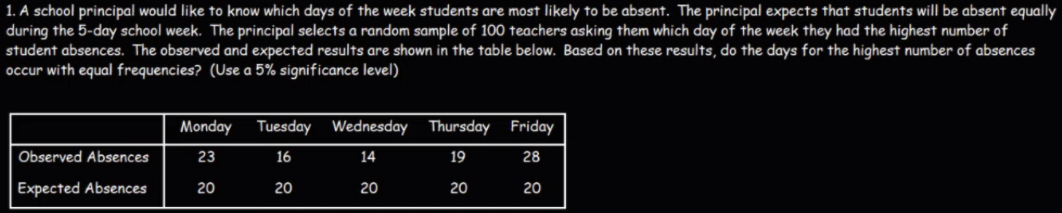

In [2]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

#Contingency table
table =[ [23,16,14,19,28] , [20,20,20,20,20]]
#print(table)

#test
stat, p, dof, expected = chi2_contingency(table)
print(f"(stat: {stat:.2f}) , (p-value: {p:.5f}) , (dof: {dof:.2f}) , (expected:{expected})")

prob = 0.95
critial_calue=chi2.ppf(prob, dof)
print("\nCritical Value: ",round(critial_calue,3),f" //   Stat: %.2f" %stat)
if stat < critial_calue:
  print("Independent (fail to reject H0 -> That says that the observed and expeceted resutls are statistically different)")
else:
  print("Dependent (reject H0 -> That says that the observed and expeceted resutls are statistically different)")

alpha = 1.0 - prob
print('\nsignificance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
  print('Dependent (reject H0 -> That says that the observed and expeceted resutls are statistically different) ')
else:
  print('Independent (fail to reject H0 -> That says that the observed and expeceted resutls are statistically different)')

(stat: 3.07) , (p-value: 0.54592) , (dof: 4.00) , (expected:[[21.5 18.  17.  19.5 24. ]
 [21.5 18.  17.  19.5 24. ]])

Critical Value:  9.488  //   Stat: 3.07
Independent (fail to reject H0 -> That says that the observed and expeceted resutls are statistically different)

significance=0.050, p=0.546
Independent (fail to reject H0 -> That says that the observed and expeceted resutls are statistically different)


9.487729036781154


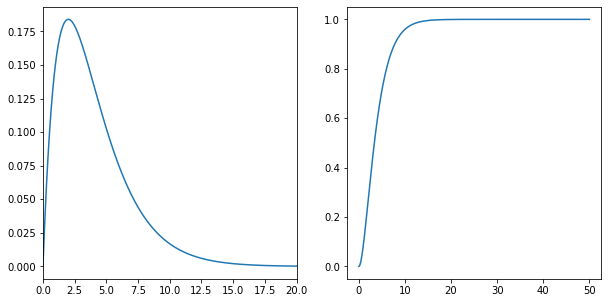

In [3]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

vals = np.arange(0,50, 0.01)
dof = 4
vals_chi2_pdf =  stats.chi2.pdf(vals, dof)
vals_chi2_cdf = stats.chi2.cdf(vals, dof)
print(stats.chi2.ppf(0.95,dof))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(vals, vals_chi2_pdf)
plt.xlim(0,20)
plt.subplot(1,2,2)
plt.plot(vals, vals_chi2_cdf)
plt.show()

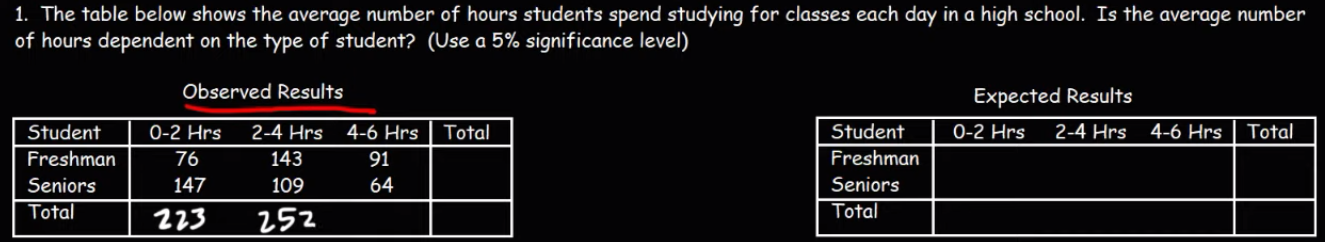

In [4]:
#Contingency table
table =[ [76,143,91] , [147,109,64]]
#print(table)

#test
stat, p, dof, expected = chi2_contingency(table)
print(f"(stat: {stat:.2f}) , (p-value: {p:.5f}) , (dof: {dof:.2f}) , (expected:{expected})")

prob = 0.95
critial_calue=chi2.ppf(prob, dof)
print("\nCritical Value: ",round(critial_calue,3),f" //   Stat: %.2f" %stat)
if stat < critial_calue:
  print("Independent (fail to reject H0 -> That says that the observed and expeceted resutls are statistically different)")
else:
  print("Dependent (reject H0 -> That says that the observed and expeceted resutls are statistically different)")

alpha = 1.0 - prob
print('\nsignificance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
  print('Dependent (reject H0 -> That says that the observed and expeceted resutls are statistically different) ')
else:
  print('Independent (fail to reject H0 -> That says that the observed and expeceted resutls are statistically different)')

(stat: 31.75) , (p-value: 0.00000) , (dof: 2.00) , (expected:[[109.73015873 124.          76.26984127]
 [113.26984127 128.          78.73015873]])

Critical Value:  5.991  //   Stat: 31.75
Dependent (reject H0 -> That says that the observed and expeceted resutls are statistically different)

significance=0.050, p=0.000
Dependent (reject H0 -> That says that the observed and expeceted resutls are statistically different) 


# The Maximum Likelihood Mehtod

In [6]:
import mle
mle.

# Binomial 
## Manual Example

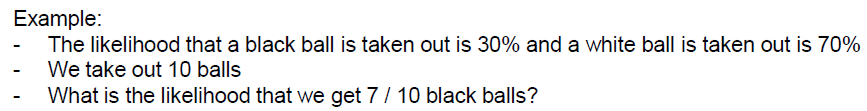

The probability of getting 7 blacks is 0.900%


,samples_black,factorial,p^k,(1-p)^(n-k),f(k)
0,0,1.0,1.000000,0.028248,0.028248
1,1,10.0,0.300000,0.040354,0.121061
2,2,45.0,0.090000,0.057648,0.233474
3,3,120.0,0.027000,0.082354,0.266828
4,4,210.0,0.008100,0.117649,0.200121
5,5,252.0,0.002430,0.168070,0.102919
6,6,210.0,0.000729,0.240100,0.036757
7,7,120.0,0.000219,0.343000,0.009002
8,8,45.0,0.000066,0.490000,0.001447
9,9,10.0,0.000020,0.700000,0.000138


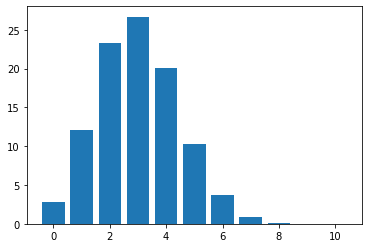

In [77]:
import math as m
import pandas as pd

#Data
n=10
k=7
p=0.3

#Calculaions single individual
factorial = m.factorial(n) / (m.factorial(k) * m.factorial(n-k))
prob = factorial * (p**k) * ((1-p)**(n-k))
print("The probability of getting 7 blacks is %.3f%%" %(prob*100))

#for binomial plotting
data = pd.DataFrame({'samples_black':range(11)})
data['factorial'] = data.samples_black.apply(lambda x: m.factorial(n) / (m.factorial(x) * m.factorial(n-x)))
data['p^k'] = p**data.samples_black
data['(1-p)^(n-k)'] = data.samples_black.apply(lambda x: (1-p)**(n-x))
data['f(k)'] = data.factorial * data['p^k'] * data['(1-p)^(n-k)']

plt.bar(data['samples_black'], data['f(k)']*100);
data

## Monte Calro simulation of exercise

0    0.02877
1    0.12250
2    0.23332
3    0.26659
4    0.19916
5    0.10300
6    0.03598
7    0.00905
8    0.00148
9    0.00015
dtype: float64


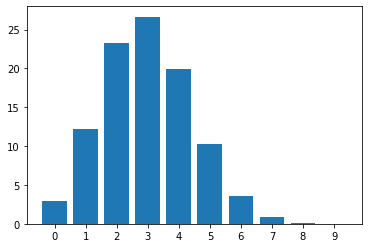

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#black balls are 1 and blue balls are 0
balls = [1]*30 + [0]*70

runs=100000
selections = []
for i in range(runs):
  selection = np.random.choice(balls, 10)
  slection_sum = np.sum(selection)
  selections.append(slection_sum)

selections = pd.Series(selections)
values = selections.value_counts().sort_index()
print(values/runs)
plt.bar(values.index, values.values/runs*100)
plt.xticks(values.index);

# Binomial Distribution confidence intervals

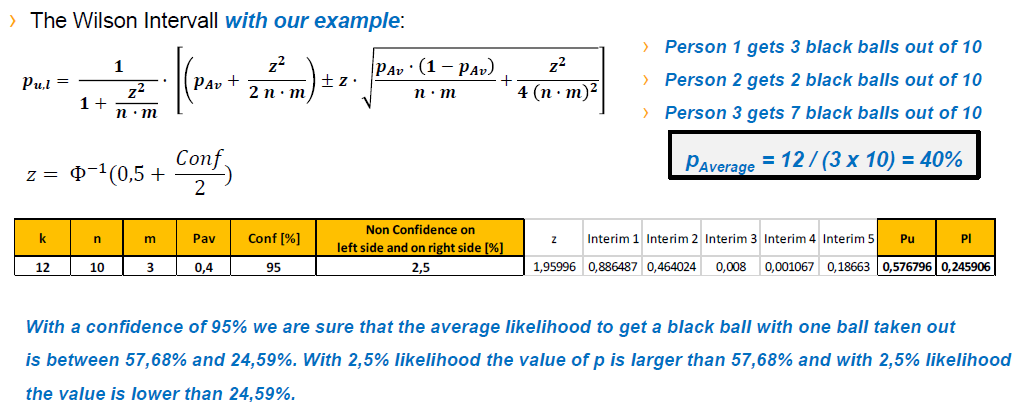

## WIlson interval

In [20]:
# Function for computing confidence intervals
from statsmodels.stats.proportion import proportion_confint   

confidence_intervals = proportion_confint(count=12,    # Number of "successes"
                                           nobs=30,    # Number of trials
                                           alpha=(1 - 0.95),
                                           method='wilson')

print("With 95%% Confidense the lower and upper intervals for the proportion are %.2f%% and %.2f%% " %(confidence_intervals[0]*100, confidence_intervals[1]*100))


With 95% Confidense the lower and upper intervals for the proportion are 24.59% and 57.68% 


## Clopper Pearson

In [21]:
# Function for computing confidence intervals
from statsmodels.stats.proportion import proportion_confint   

confidence_intervals = proportion_confint(count=12,    # Number of "successes"
                                           nobs=30,    # Number of trials
                                           alpha=(1 - 0.95), #confidense interval
                                           method='beta')  # method used

print("With 95%% Confidense the lower and upper intervals for the proportion are %.2f%% and %.2f%% " %(confidence_intervals[0]*100, confidence_intervals[1]*100))


With 95% Confidense the lower and upper intervals for the proportion are 22.66% and 59.40% 


### Small exercise 1:

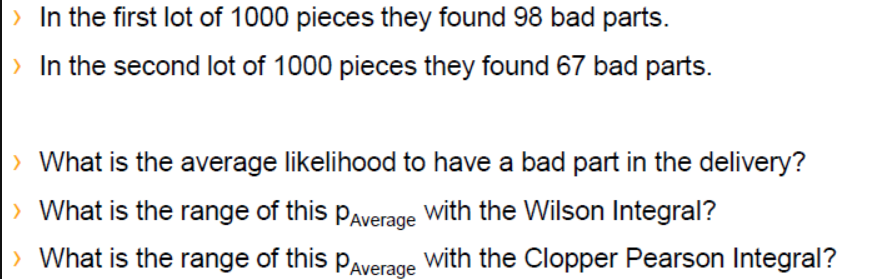

In [32]:
# Average Lielihood of having a part part in delivery
p = (98+67) / (1000*2)
print("%.2f%% is the likelihood of having a bad part in the shipment" %(p*100))

# range of this pAverage with the Wilson Integral
from statsmodels.stats.proportion import proportion_confint 
confidence_intervals = proportion_confint(count=(98+67),    # Number of "successes"
                                           nobs=2000,    # Number of trials
                                           alpha=(1 - 0.95), #confidense interval
                                           method='wilson')  # method used
print("%.2f%% and %.2f%% are the lower and upper intervals for the proportion with 95%% Confidense on Wilson integral" 
      %(confidence_intervals[0]*100, confidence_intervals[1]*100))

# range of this pAverage with the Clopper Pearson Integral
from statsmodels.stats.proportion import proportion_confint 
confidence_intervals = proportion_confint(count=(98+67),    # Number of "successes"
                                           nobs=2000,    # Number of trials
                                           alpha=(1 - 0.95), #confidense interval
                                           method='beta')  # method used
print("%.2f%% and %.2f%% are the lower and upper intervals for the proportion with 95%% Confidense on Clopper Pearson Integral" 
      %(confidence_intervals[0]*100, confidence_intervals[1]*100))


8.25% is the likelihood of having a bad part in the shipment
7.12% and 9.54% are the lower and upper intervals for the proportion with 95% Confidense on Wilson integral
7.08% and 9.54% are the lower and upper intervals for the proportion with 95% Confidense on Clopper Pearson Integral


### Small exercise 2:

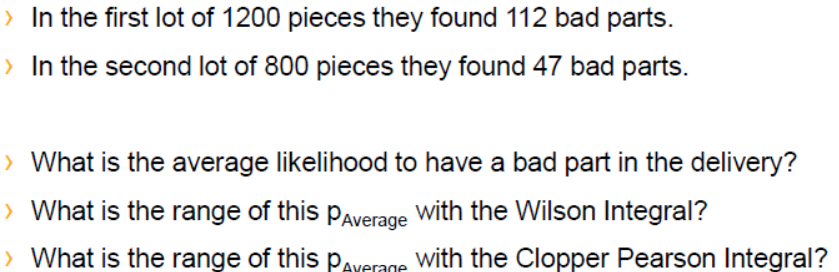

In [31]:
# Average Lielihood of having a part part in delivery
p = (112+47) / (2000)
print("%.2f%% is the likelihood of having a bad part in the shipment" %(p*100))

# range of this pAverage with the Wilson Integral
from statsmodels.stats.proportion import proportion_confint 
confidence_intervals = proportion_confint(count=(112+47),    # Number of "successes"
                                           nobs=2000,    # Number of trials
                                           alpha=(1 - 0.95), #confidense interval
                                           method='wilson')  # method used
print("%.2f%% and %.2f%% are the lower and upper intervals for the proportion with 95%% Confidense on Wilson integral" 
      %(confidence_intervals[0]*100, confidence_intervals[1]*100))

# range of this pAverage with the Clopper Pearson Integral
from statsmodels.stats.proportion import proportion_confint 
confidence_intervals = proportion_confint(count=(112+47),    # Number of "successes"
                                           nobs=2000,    # Number of trials
                                           alpha=(1 - 0.95), #confidense interval
                                           method='beta')  # method used
print("%.2f%% and %.2f%% are the lower and upper intervals for the proportion with 95%% Confidense on Clopper Pearson Integral" 
      %(confidence_intervals[0]*100, confidence_intervals[1]*100))


7.95% is the likelihood of having a bad part in the shipment
6.84% and 9.22% are the lower and upper intervals for the proportion with 95% Confidense on Wilson integral
6.80% and 9.22% are the lower and upper intervals for the proportion with 95% Confidense on Clopper Pearson Integral
